In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#koneksi dari COLAB ke Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Data

path = '/content/drive/MyDrive/ppsi/healthy_lifestyle_city_2021.xlsx'

df = pd.read_excel(path)
df

City  Rank Sunshine hours(City)  \
0          Amsterdam     1                 1858   
1             Sydney     2                 2636   
2             Vienna     3                 1884   
3          Stockholm     4                 1821   
4         Copenhagen     5                 1630   
5           Helsinki     6                 1662   
6            Fukuoka     7                 2769   
7             Berlin     8                 1626   
8          Barcelona     9                 2591   
9          Vancouver    10                 1938   
10         Melbourne    11                 2363   
11           Beijing    12                 2671   
12           Bangkok    13                 2624   
13      Buenos Aires    14                 2525   
14           Toronto    15                 2066   
15            Madrid    16                 2769   
16           Jakarta    17                 2983   
17             Seoul    18                 2066   
18         Frankfurt    19                 1662   
19            Geneva    20                    -   
20          Tel Aviv    21                 3311   
21          Istanbul    22                 2218   
22             Cairo    23                 3542   
23            Taipei    24                 1405   
24       Los Angeles    25                 3254   
25            Mumbai    26                 2584   
26            Boston    27                 2634   
27            Dublin    28                 1453   
28             Tokyo    29                 1877   
29           Chicago    30                 2508   
30         Hong Kong    31                 1836   
31          Shanghai    32                 1776   
32          Brussels    33                 1546   
33     San Francisco    34                 3062   
34             Paris    35                 1662   
35         Sao Paulo    36                 2003   
36            Zurich    37                 1566   
37            London    38                 1633   
38      Johannesburg    39                 3124   
39             Milan    40                 1915   
40  Washington  D.C.    41                 2528   
41          New York    42                 2535   
42            Moscow    43                 1901   
43       Mexico City    44                 2555   

   Cost of a bottle of water(City)  Obesity levels(Country)  \
0                           Â£1.92                    0.204   
1                           Â£1.48                    0.290   
2                           Â£1.94                    0.201   
3                           Â£1.72                    0.206   
4                           Â£2.19                    0.197   
5                           Â£1.60                    0.222   
6                           Â£0.78                    0.043   
7                           Â£1.55                    0.223   
8                           Â£1.19                    0.238   
9                           Â£1.08                    0.294   
10                          Â£1.57                    0.290   
11                          Â£0.26                    0.062   
12                          Â£0.22                    0.100   
13                          Â£0.57                    0.283   
14                          Â£1.09                    0.294   
15                          Â£1.30                    0.238   
16                          Â£0.21                    0.069   
17                          Â£0.59                    0.047   
18                          Â£1.95                    0.223   
19                          Â£2.62                    0.195   
20                          Â£1.63                    0.261   
21                          Â£0.15                    0.321   
22                          Â£0.16                    0.320   
23                          Â£0.57                    0.062   
24                          Â£1.52                    0.362   
25                          Â£0.15                    0.039   
26                 

In [ ]:
modus = df[df['Sunshine hours(City)'] != '-']['Sunshine hours(City)'].mode()[0]

# Mengganti nilai '-' dengan modus
df['Sunshine hours(City)'] = df['Sunshine hours(City)'].replace('-', modus)


In [ ]:
modus = df[df['Pollution(Index score) (City)'] != '-']['Pollution(Index score) (City)'].mode()[0]

# Mengganti nilai '-' dengan modus
df['Pollution(Index score) (City)'] = df['Pollution(Index score) (City)'].replace('-', modus)


In [ ]:
modus = df[df['Annual avg. hours worked'] != '-']['Annual avg. hours worked'].mode()[0]

# Mengganti nilai '-' dengan modus
df['Annual avg. hours worked'] = df['Annual avg. hours worked'].replace('-', modus)

In [ ]:
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].str.replace('Â£', '')


In [ ]:
df['Sunshine hours(City)'].astype(int)
df['Pollution(Index score) (City)'].astype(int)
df['Annual avg. hours worked'].astype(int)
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].astype(float)

In [ ]:
print(df.dtypes)
print('____')
print(df.describe())
print('____')
print('Data Null ?')
print(df.isnull().sum())

City                                       object
Rank                                        int64
Sunshine hours(City)                        int64
Cost of a bottle of water(City)            object
Obesity levels(Country)                   float64
Life expectancy(years) (Country)          float64
Pollution(Index score) (City)             float64
Annual avg. hours worked                    int64
Happiness levels(Country)                 float64
Outdoor activities(City)                    int64
Number of take out places(City)             int64
Cost of a monthly gym membership(City)    float64
dtype: object
____
            Rank  Sunshine hours(City)  Obesity levels(Country)  \
count  44.000000             44.000000                44.000000   
mean   22.500000           2232.590909                 0.219250   
std    12.845233            567.633165                 0.101957   
min     1.000000           1405.000000                 0.039000   
25%    11.750000           1747.500000        

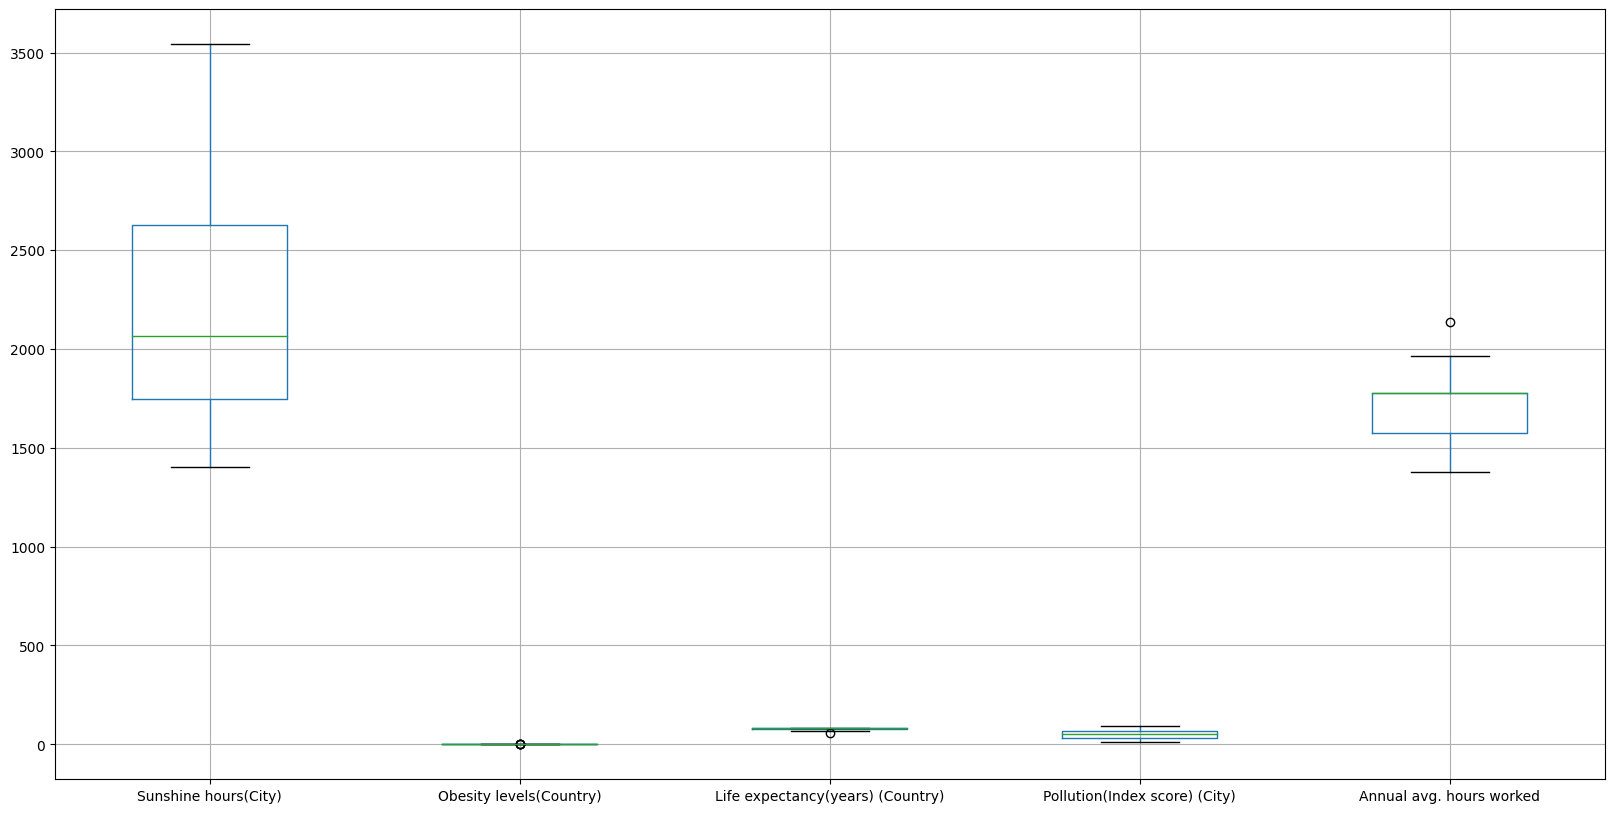

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot(column=['Sunshine hours(City)','Obesity levels(Country)','Life expectancy(years) (Country)','Pollution(Index score) (City)','Annual avg. hours worked'])
plt.show()

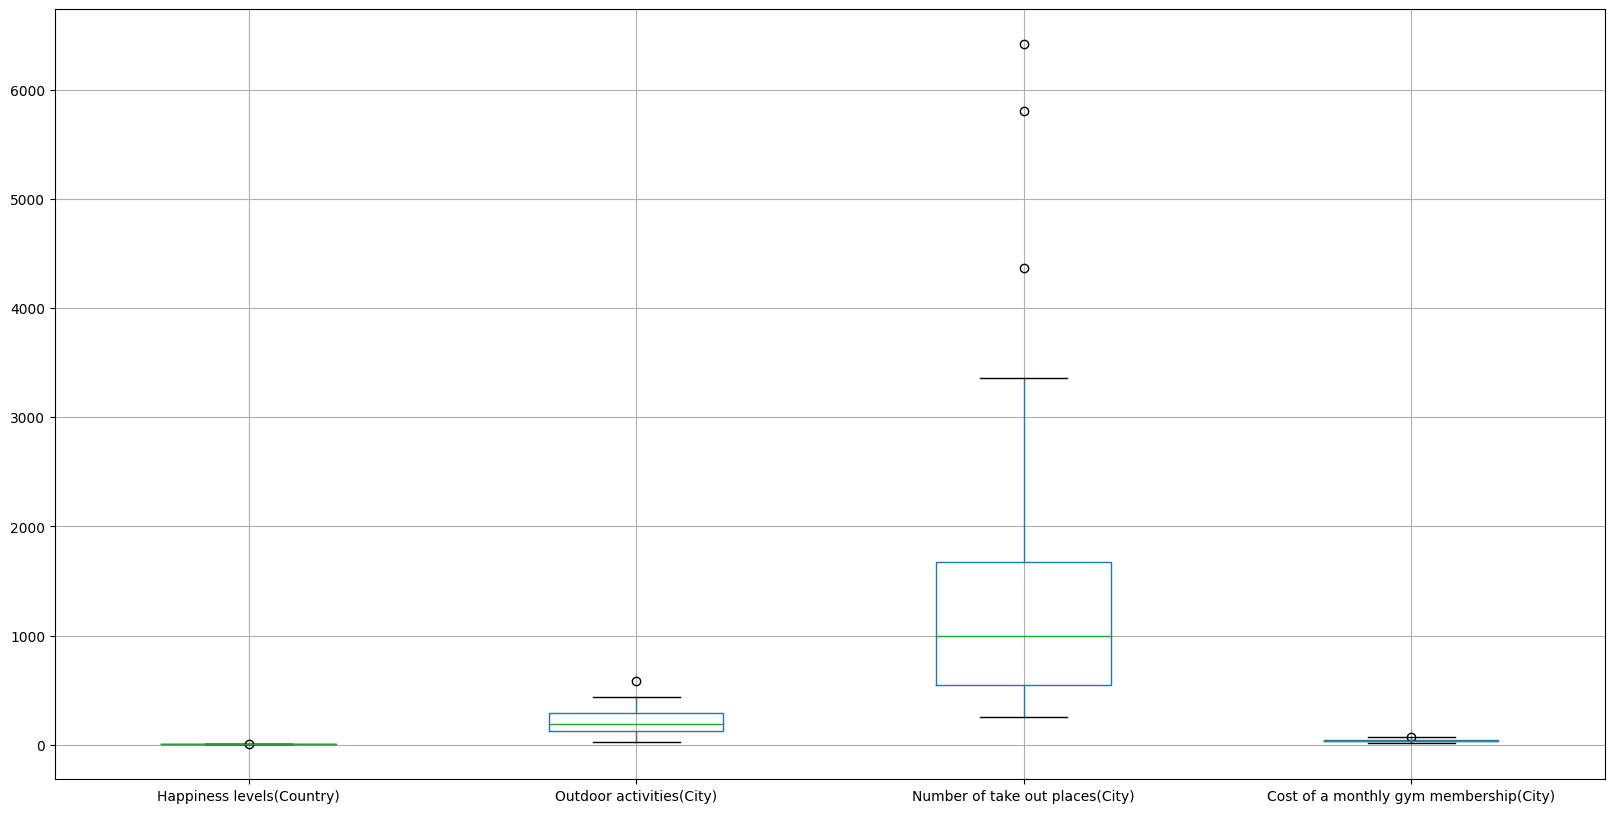

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot(column=['Happiness levels(Country)','Outdoor activities(City)','Number of take out places(City)','Cost of a monthly gym membership(City)'])
plt.show()

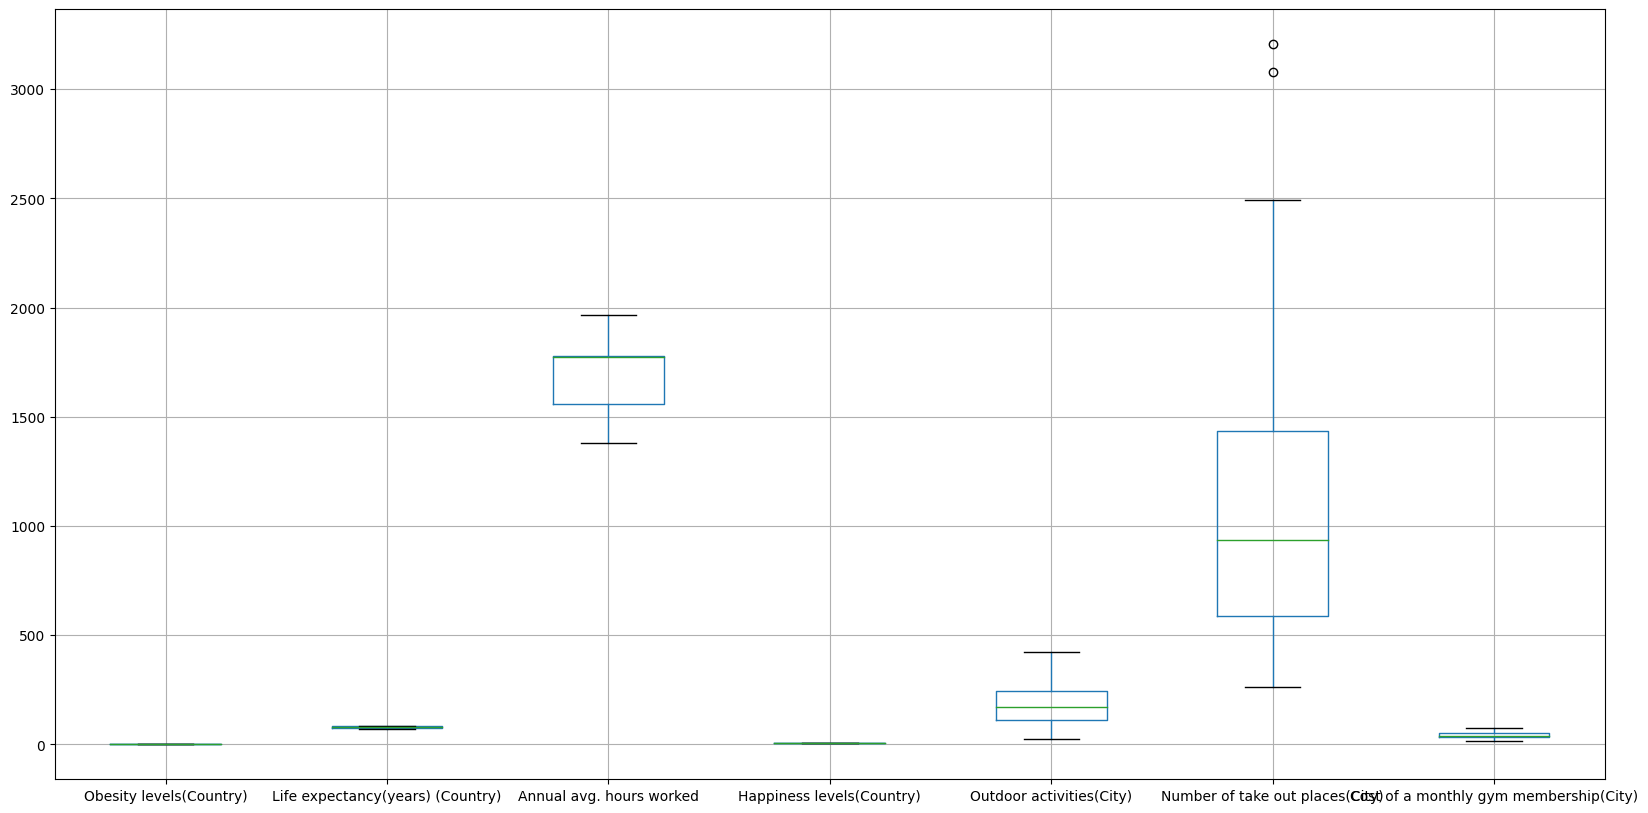

In [ ]:
# Fungsi untuk mendeteksi dan menangani outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Menghapus outlier untuk setiap kolom yang diinginkan
columns_to_check = [
    'Obesity levels(Country)',
    'Life expectancy(years) (Country)',
    'Annual avg. hours worked',
    'Happiness levels(Country)',
    'Outdoor activities(City)',
    'Number of take out places(City)',
    'Cost of a monthly gym membership(City)'
]

for column in columns_to_check:
    df = remove_outliers(df, column)

# Membuat boxplot setelah menghapus outlier
plt.figure(figsize=(20,10))
df.boxplot(column=columns_to_check)
plt.show()

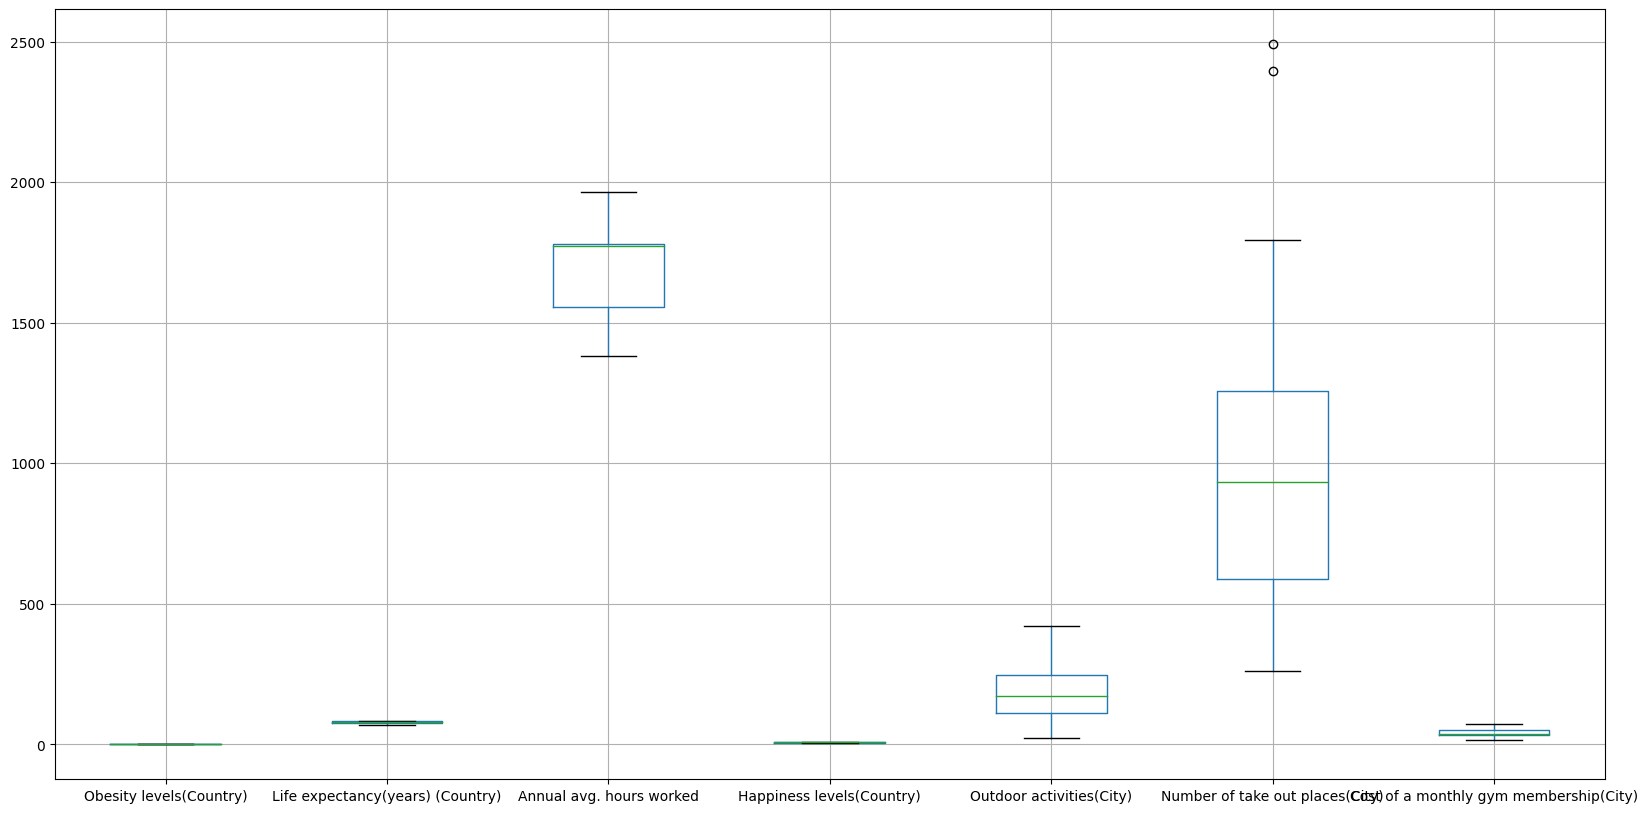

In [ ]:
# Fungsi untuk mendeteksi dan mengganti outlier dengan median menggunakan IQR
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

# Mengganti outlier dengan median untuk setiap kolom yang diinginkan
for column in columns_to_check:
    replace_outliers_with_median(df, column)

# Membuat boxplot setelah mengganti outlier
plt.figure(figsize=(20,10))
df.boxplot(column=columns_to_check)
plt.show()

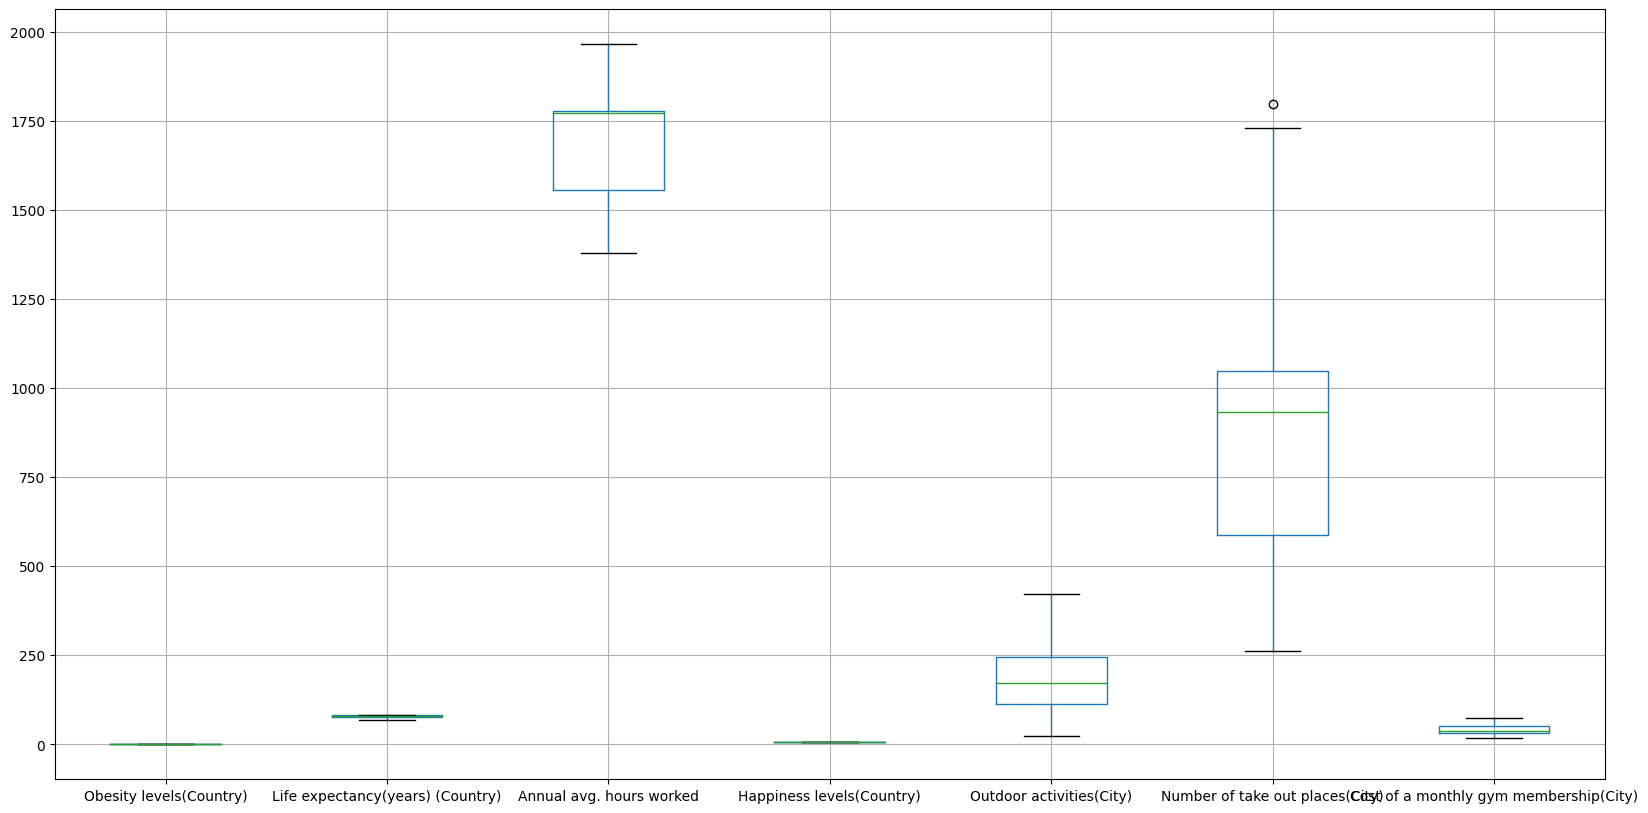

In [ ]:
# Fungsi untuk mendeteksi dan mengganti outlier dengan median menggunakan IQR
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

# Mengganti outlier dengan median untuk setiap kolom yang diinginkan
for column in columns_to_check:
    replace_outliers_with_median(df, column)

# Membuat boxplot setelah mengganti outlier
plt.figure(figsize=(20,10))
df.boxplot(column=columns_to_check)
plt.show()

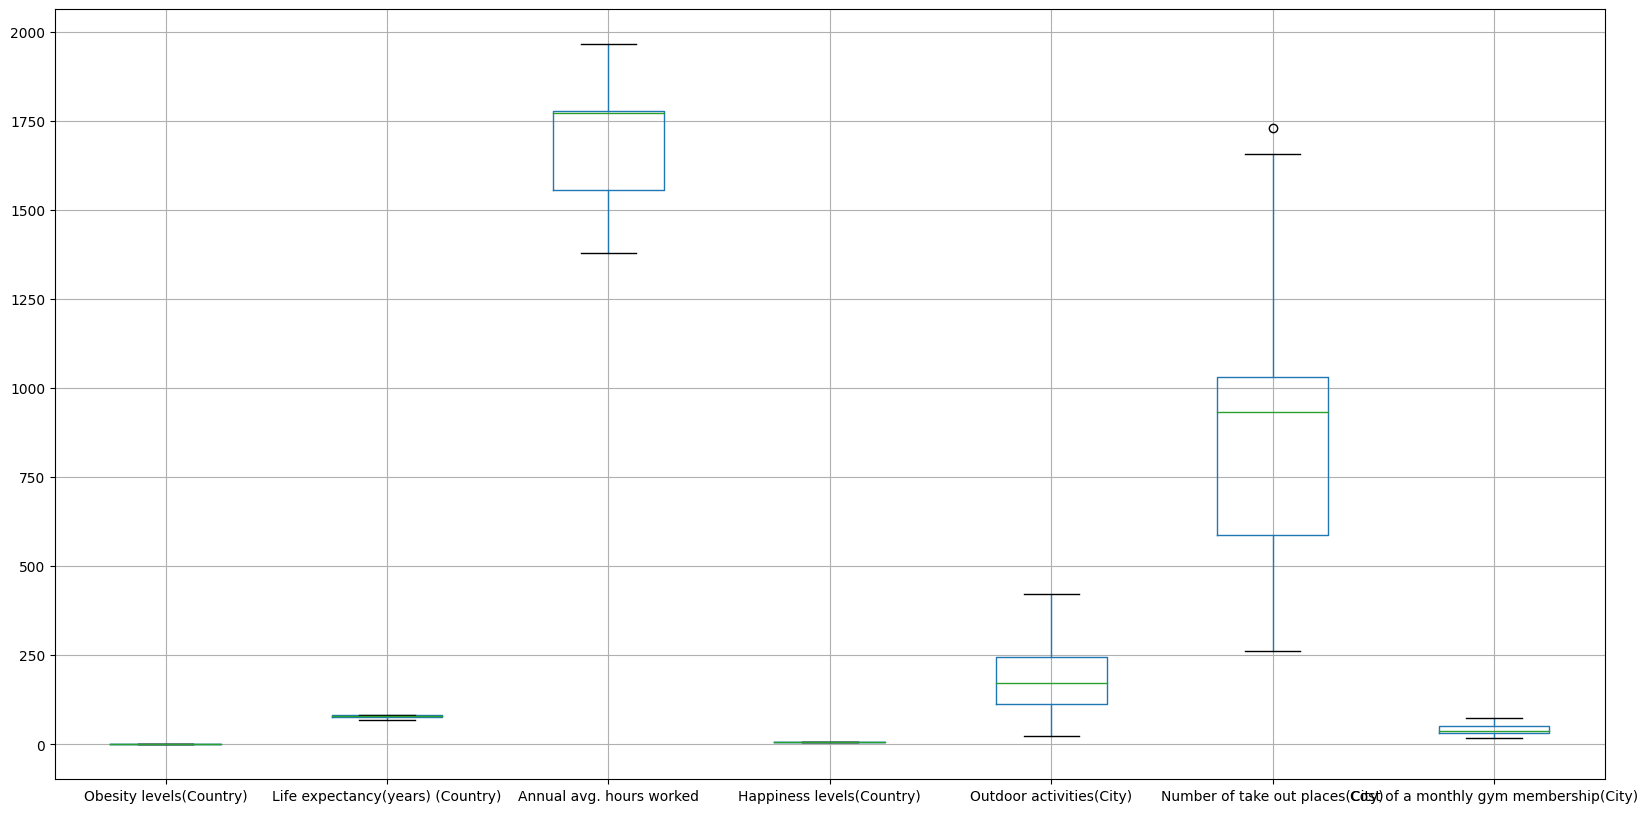

In [ ]:
# Fungsi untuk mendeteksi dan mengganti outlier dengan median menggunakan IQR
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

# Mengganti outlier dengan median untuk setiap kolom yang diinginkan
for column in columns_to_check:
    replace_outliers_with_median(df, column)

# Membuat boxplot setelah mengganti outlier
plt.figure(figsize=(20,10))
df.boxplot(column=columns_to_check)
plt.show()

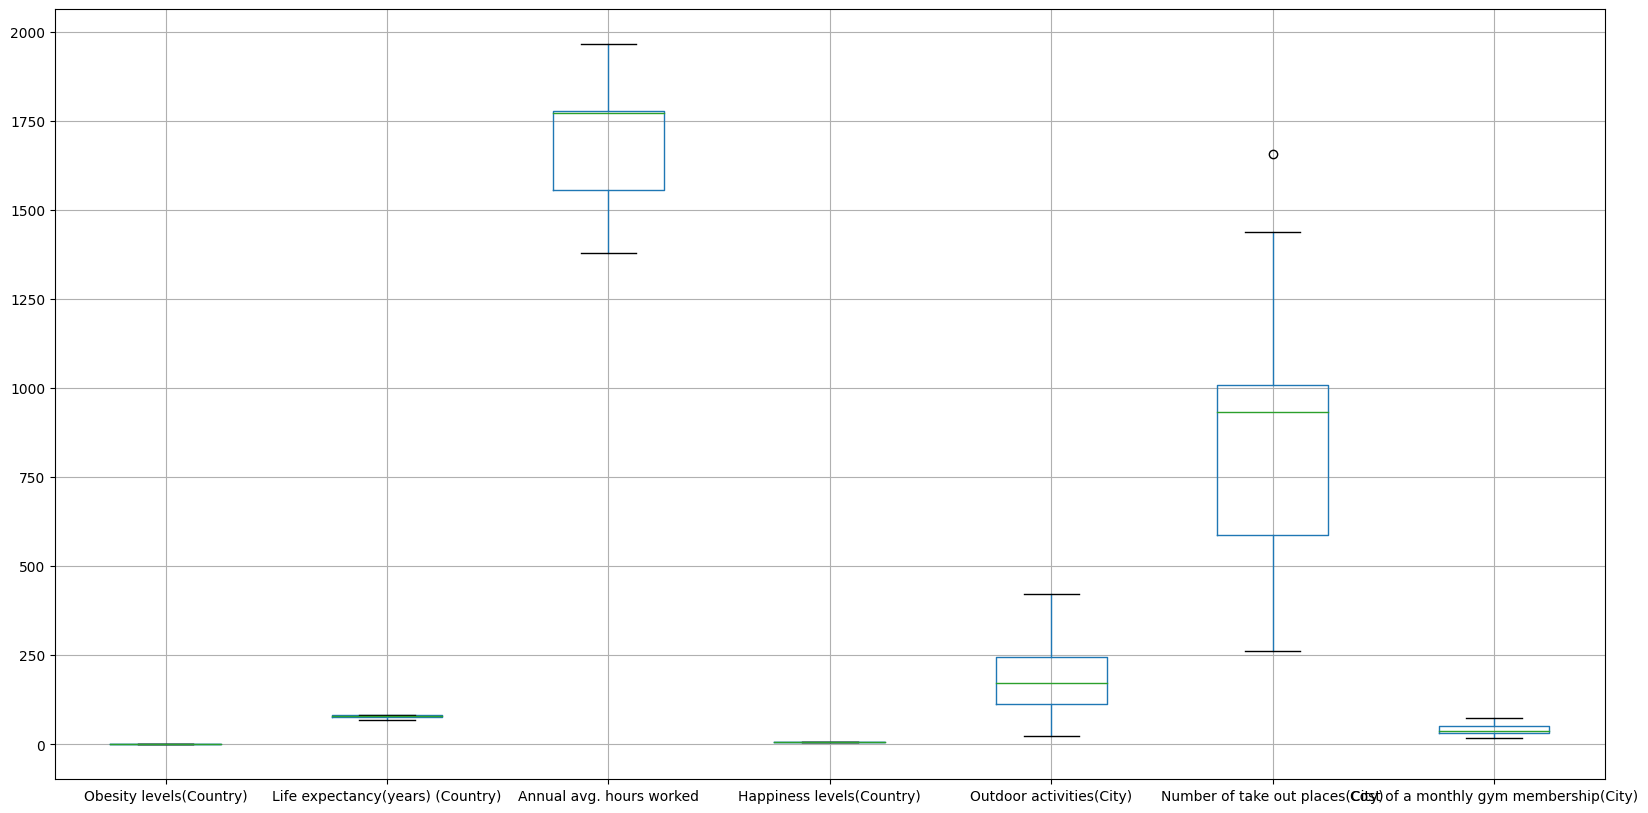

In [ ]:
# Fungsi untuk mendeteksi dan mengganti outlier dengan median menggunakan IQR
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

# Mengganti outlier dengan median untuk setiap kolom yang diinginkan
for column in columns_to_check:
    replace_outliers_with_median(df, column)

# Membuat boxplot setelah mengganti outlier
plt.figure(figsize=(20,10))
df.boxplot(column=columns_to_check)
plt.show()

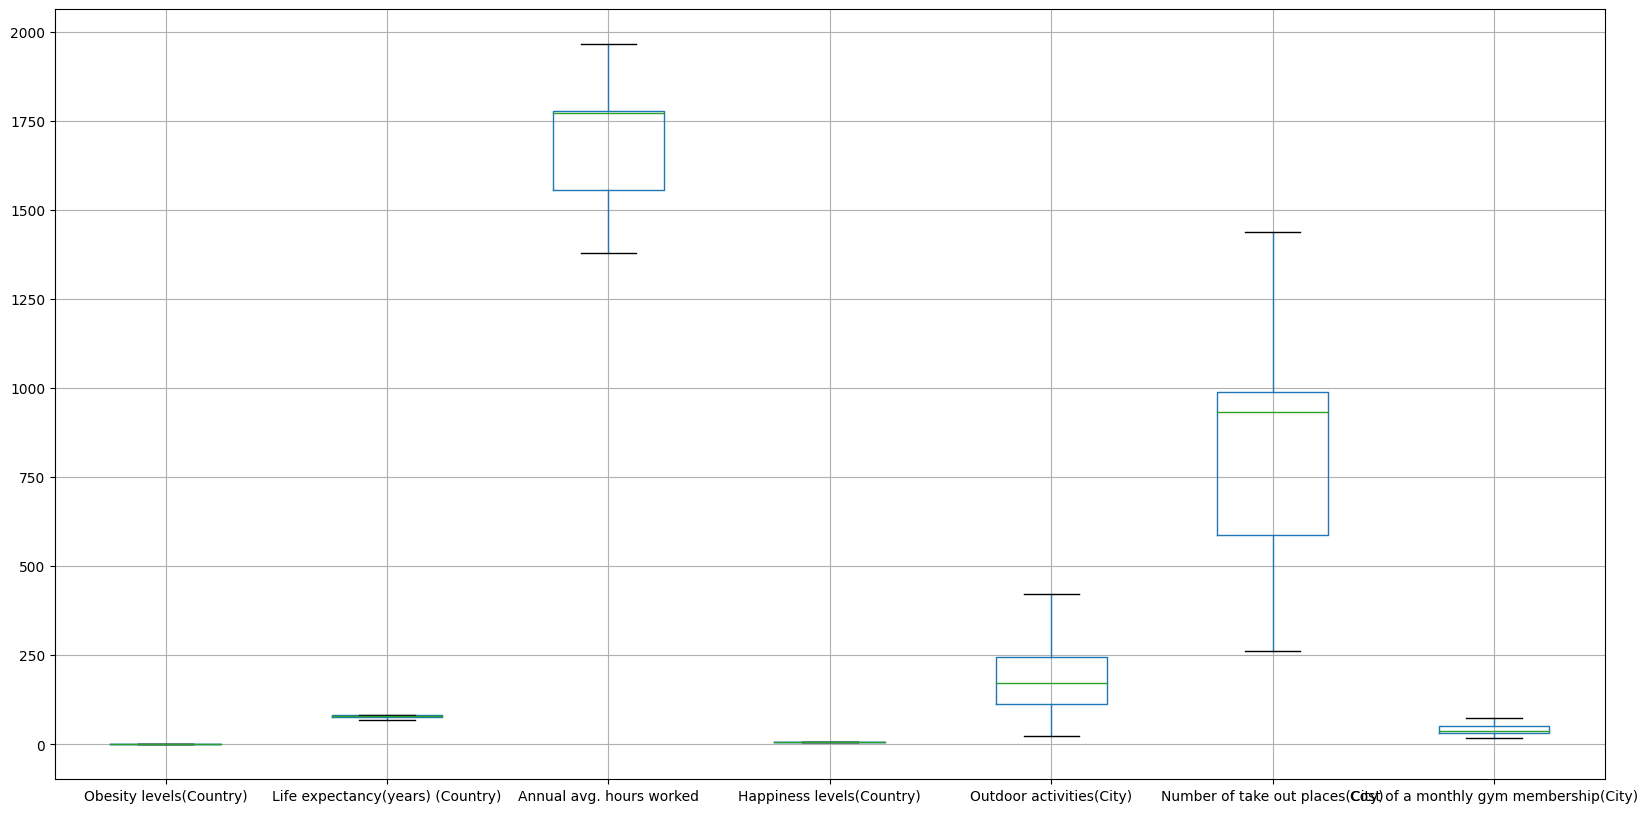

In [ ]:
# Fungsi untuk mendeteksi dan mengganti outlier dengan median menggunakan IQR
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

# Mengganti outlier dengan median untuk setiap kolom yang diinginkan
for column in columns_to_check:
    replace_outliers_with_median(df, column)

# Membuat boxplot setelah mengganti outlier
plt.figure(figsize=(20,10))
df.boxplot(column=columns_to_check)
plt.show()

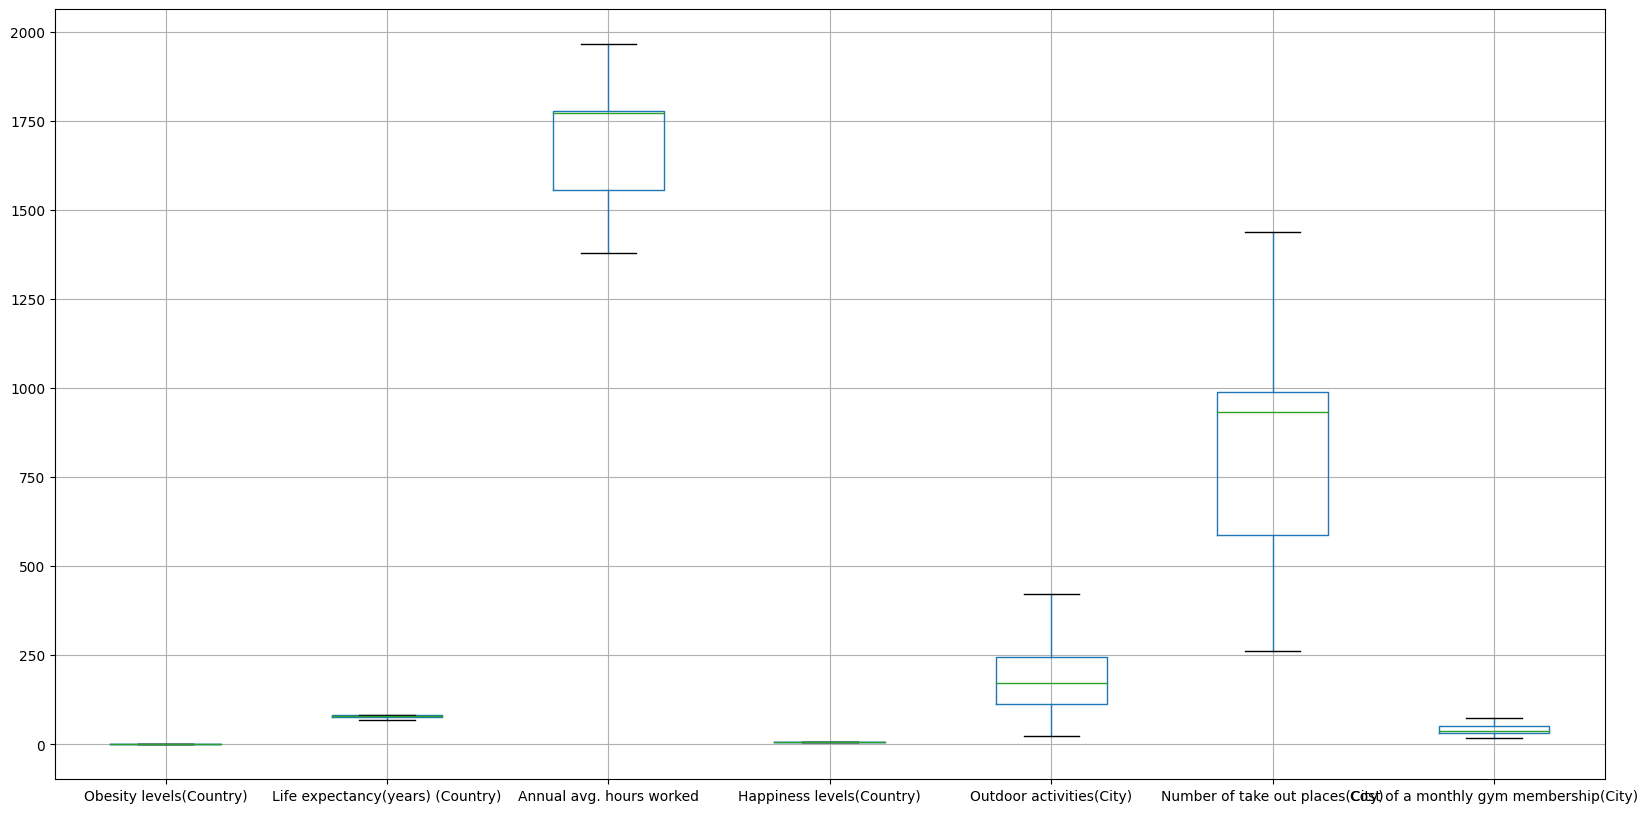

In [ ]:
# Fungsi untuk mendeteksi dan mengganti outlier dengan median menggunakan IQR
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

# Mengganti outlier dengan median untuk setiap kolom yang diinginkan
for column in columns_to_check:
    replace_outliers_with_median(df, column)

# Membuat boxplot setelah mengganti outlier
plt.figure(figsize=(20,10))
df.boxplot(column=columns_to_check)
plt.show()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 35.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=aa68afc368b83113c95b9ea87903c8444747a5deb08f6b56183550183ade2193
  Stored in directory: /tmp/pip-ephem-wheel-cache-30kbwdzo/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=392232f54f3bc1e1b432d2d71d60386f4ee8c2805259c367d010f441acb763b2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(df, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Menentukan input variabel

x = df[['Obesity levels(Country)','Life expectancy(years) (Country)','Annual avg. hours worked','Happiness levels(Country)','Outdoor activities(City)','Number of take out places(City)','Cost of a monthly gym membership(City)']]

Jumlah Klaster = 1 Nilai SSE = 4198475.477297636
Jumlah Klaster = 2 Nilai SSE = 1965286.7076086462
Jumlah Klaster = 3 Nilai SSE = 1355124.1241209672
Jumlah Klaster = 4 Nilai SSE = 1076961.99689725
Jumlah Klaster = 5 Nilai SSE = 784504.7715930715
Jumlah Klaster = 6 Nilai SSE = 549127.8033237285
Jumlah Klaster = 7 Nilai SSE = 405850.77232664044
Jumlah Klaster = 8 Nilai SSE = 349541.3639792239
Jumlah Klaster = 9 Nilai SSE = 303670.59776000003


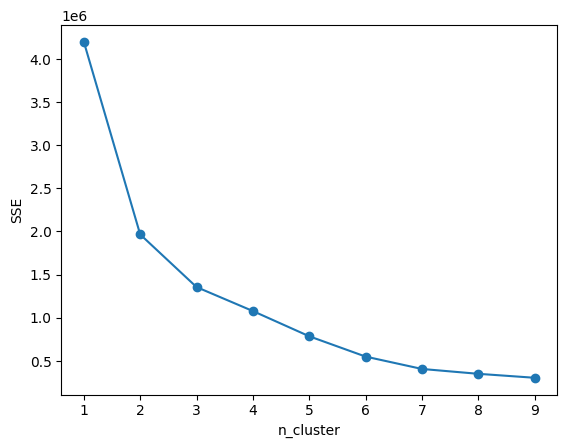

In [ ]:
# SSE Method
sse = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(x)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print("Jumlah Klaster =",i,"Nilai SSE =", sse_)

plt.plot(index, sse,  marker='o')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

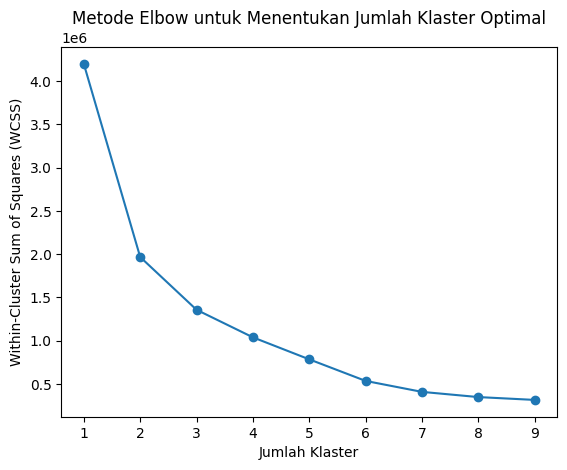

In [ ]:
# Elbow Method

# Inisialisasi range jumlah klaster yang akan diuji
cluster_range = range(1, 10)
cluster_wss = []

# Menghitung within-cluster sum of squares (WCSS) untuk setiap jumlah klaster
for num_cluster in cluster_range:
    cluster = KMeans(n_clusters=num_cluster)
    cluster.fit(x)
    cluster_wss.append(cluster.inertia_)

# Visualisasi dengan plot garis (elbow method)
plt.plot(cluster_range, cluster_wss, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()

In [ ]:
range_n_cluster = [3, 4, 5]
silhouette_scores = []

for n_clusters in range_n_cluster:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_means = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, y_means)
    silhouette_scores.append(silhouette_avg)
    print("Jumlah Klaster =", n_clusters, "Nilai rata-rata Silhouette =", silhouette_avg)

Jumlah Klaster = 3 Nilai rata-rata Silhouette = 0.40344650721978564
Jumlah Klaster = 4 Nilai rata-rata Silhouette = 0.3985491331125608
Jumlah Klaster = 5 Nilai rata-rata Silhouette = 0.393049701052633


In [ ]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada data
x_standardized = scaler.fit_transform(x)

#jumlah klaster optimal yang telah ditentukan adalah 3
optimal_num_clusters = 3

# Inisialisasi model K-Means dengan jumlah klaster optimal
kmeans_model = KMeans(n_clusters=optimal_num_clusters, random_state=0)

# Melakukan fitting model pada data yang sudah distandarisasi
kmeans_model.fit(x_standardized)

# Menambahkan kolom klaster ke dalam dataframe (atau dataset Anda)
df['Cluster'] = kmeans_model.labels_
df

City  Rank  Sunshine hours(City)  \
0          Amsterdam     1                  1858   
1             Sydney     2                  2636   
2             Vienna     3                  1884   
3          Stockholm     4                  1821   
4         Copenhagen     5                  1630   
5           Helsinki     6                  1662   
7             Berlin     8                  1626   
9          Vancouver    10                  1938   
10         Melbourne    11                  2363   
11           Beijing    12                  2671   
12           Bangkok    13                  2624   
13      Buenos Aires    14                  2525   
14           Toronto    15                  2066   
15            Madrid    16                  2769   
16           Jakarta    17                  2983   
18         Frankfurt    19                  1662   
19            Geneva    20                  1662   
20          Tel Aviv    21                  3311   
21          Istanbul    22                  2218   
23            Taipei    24                  1405   
24       Los Angeles    25                  3254   
26            Boston    27                  2634   
27            Dublin    28                  1453   
29           Chicago    30                  2508   
30         Hong Kong    31                  1836   
31          Shanghai    32                  1776   
32          Brussels    33                  1546   
33     San Francisco    34                  3062   
36            Zurich    37                  1566   
39             Milan    40                  1915   
40  Washington  D.C.    41                  2528   
41          New York    42                  2535   
42            Moscow    43                  1901   

   Cost of a bottle of water(City)  Obesity levels(Country)  \
0                           Â£1.92                    0.204   
1                           Â£1.48                    0.290   
2                           Â£1.94                    0.201   
3                           Â£1.72                    0.206   
4                           Â£2.19                    0.197   
5                           Â£1.60                    0.222   
7                           Â£1.55                    0.223   
9                           Â£1.08                    0.294   
10                          Â£1.57                    0.290   
11                          Â£0.26                    0.062   
12                          Â£0.22                    0.100   
13                          Â£0.57                    0.283   
14                          Â£1.09                    0.294   
15                          Â£1.30                    0.238   
16                          Â£0.21                    0.069   
18                          Â£1.95                    0.223   
19                          Â£2.62                    0.195   
20                          Â£1.63                    0.261   
21                          Â£0.15                    0.321   
23                          Â£0.57                    0.062   
24                          Â£1.52                    0.362   
26                          Â£1.39                    0.362   
27                          Â£1.40                    0.253   
29                          Â£1.20                    0.362   
30                          Â£0.75                    0.062   
31                          Â£0.29                    0.062   
32                          Â£2.11                    0.221   
33                          Â£1.60                    0.362   
36                          Â£3.20                    0.195   
39                          Â£1.15                    0.199   
40                          Â£1.45                    0.362   
41                          Â£1.32                    0.362   
42                          Â£0.41                    0.231   

    Life expectancy(years) (Country)  Pollution(Index score) (City)  \
0                               8

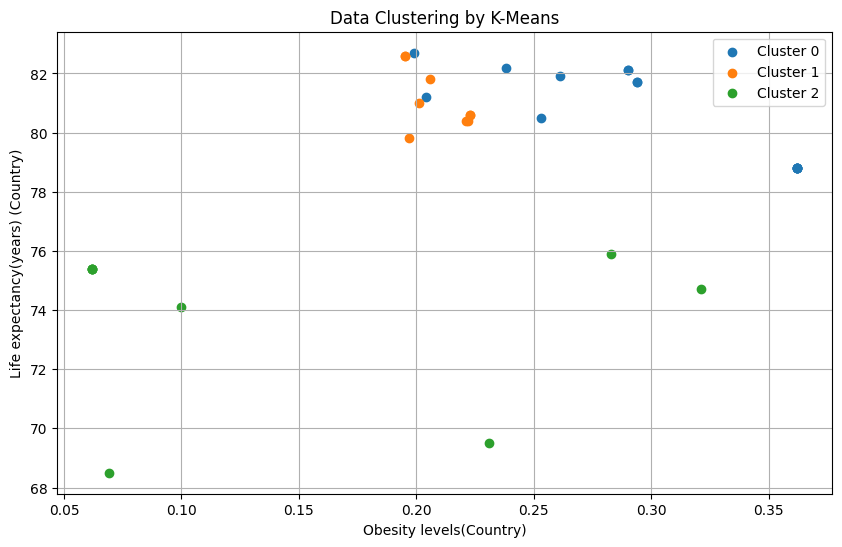

In [ ]:
# Plot data berdasarkan klaster
plt.figure(figsize=(10, 6))

# Loop melalui setiap klaster dan plot data
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Obesity levels(Country)'], cluster_data['Life expectancy(years) (Country)'], label=f'Cluster {cluster_label}')

plt.xlabel('Obesity levels(Country)')
plt.ylabel('Life expectancy(years) (Country)')
plt.title('Data Clustering by K-Means')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Eksport to download if in colab
from google.colab import files

file_cluster = df.to_excel('Clustering Healthy lifestyle.xlsx', sheet_name='predict')
files.download('Clustering Healthy lifestyle.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>